<a href="https://colab.research.google.com/github/lizzymuch/github_Share/blob/main/NN_all_in_one2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
import scipy.stats as stats
import csv

In [ ]:
# simplified method 
on2 = [40, 80, 160, 320]
total2 = [800, 1600, 3200, 6400]
on8 = [20, 40, 80, 160]
total8 = [1600, 3200, 6400, 12800]
minl = 20
maxl = 13000
dnn_type_amount = 75
cnn_type_amount= 25
pad_type = 'all0' # 'all0' or '0000-1+640'


if pad_type == '0000-1+640':
    maxl=13000

def generate(n_event, total, on, same_length=True, minl = 20, maxl = 12800):
    total //=minl
    on //=minl
    start = [on*i + x for i, x in enumerate(sorted(random.sample(range(total - (n_event-1)*on - on), n_event)))]
    sound = [0]*total
    for i in start:
        sound[i:i+on] = [1]*on
    if same_length:
        if pad_type == 'all0':
            full = maxl//minl
            if full>total:
                sound = [0]*(full-total) + sound
        elif pad_type == '0000-1+640':
            full = maxl//minl
            if full>total:
                sound = [0]*(full-total-1) +[-1] + sound
    return sound

# training + validation data
def gen_train(on2, total2, on8, total8, type_amount):
    X2 = []
    for o in on2:
        for t in total2:
            for i in range(type_amount):
                X2.append(generate(2, t, o, minl=minl, maxl=maxl))
    X8 = []
    for o in on8:
        for t in total8:
            for i in range(type_amount):
                X8.append(generate(8, t, o, minl=minl, maxl=maxl))
    y = np.concatenate((np.zeros(len(X2)), np.ones(len(X8))))
    X = np.concatenate((X2, X8))
    X, y = shuffle(X, y, random_state=2)            
    return X, y

# testing data
test_amount = 200
X2t = []
for o in on2:
    for t in total2:
        for i in range(test_amount):
            X2t.append(generate(2, t, o, minl=minl, maxl=maxl))
X8t = []
for o in on8:
    for t in total8:
        for i in range(test_amount):
            X8t.append(generate(8, t, o, minl=minl, maxl=maxl))
Xt = np.concatenate((X2t, X8t))       
yt = np.concatenate((np.zeros(len(X2t)), np.ones(len(X8t))))

mix_amount = 200
X_mix1 = [] 
for n in [1,2,3,4,6,8,16]:       
    for i in range(mix_amount):
        X_mix1.append(generate(n, 6400, 200, minl=minl, maxl=maxl))

X_mix2 = [] 
for n in [1,2,3,4,6,8,16]:
    this_on = 800//n      
    for i in range(mix_amount):
        X_mix2.append(generate(n, 6400, this_on, minl=minl, maxl=maxl))
        
y_mix = np.ones(mix_amount)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

------- 1 --------
200/200 [==============================] - 1s 3ms/step - loss: 0.1254 - accuracy: 0.9897


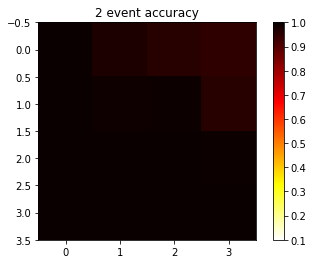

[1.0, 0.9750000238418579, 0.9599999785423279, 0.949999988079071, 1.0, 0.9900000095367432, 0.9950000047683716, 0.9599999785423279, 1.0, 1.0, 1.0, 0.9950000047683716, 1.0, 1.0, 1.0, 1.0]


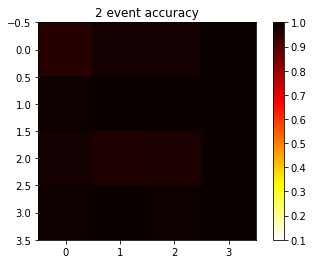

[0.9599999785423279, 0.9850000143051147, 0.9850000143051147, 1.0, 0.9950000047683716, 1.0, 1.0, 1.0, 0.9850000143051147, 0.9700000286102295, 0.9750000238418579, 1.0, 0.9950000047683716, 1.0, 0.9950000047683716, 1.0]


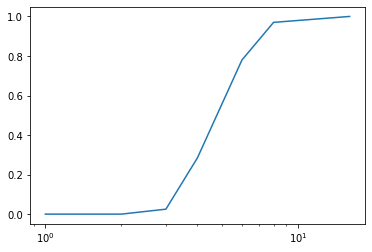

[0.0, 0.0, 0.02500000037252903, 0.2849999964237213, 0.7799999713897705, 0.9700000286102295, 1.0]


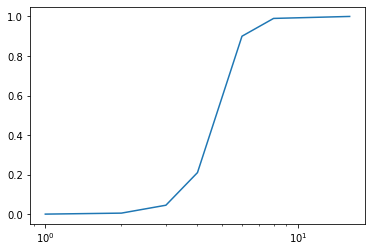

[0.0, 0.004999999888241291, 0.04500000178813934, 0.20999999344348907, 0.8999999761581421, 0.9900000095367432, 1.0]


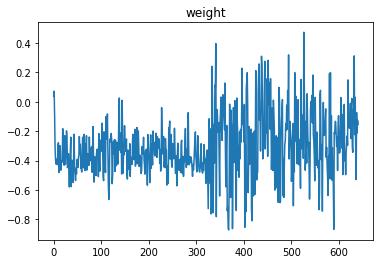

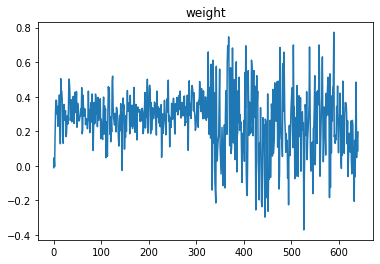

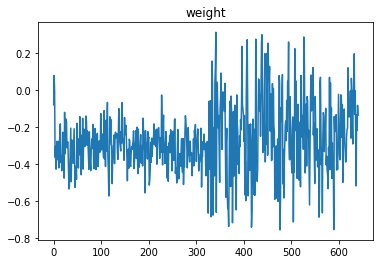

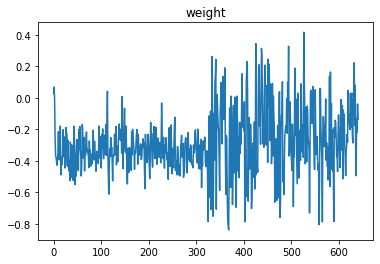

------- 2 --------
200/200 [==============================] - 1s 3ms/step - loss: 0.1416 - accuracy: 0.9844


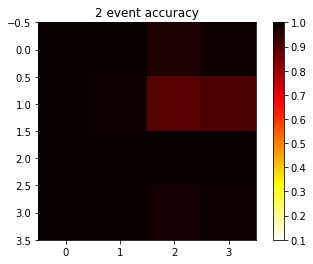

[1.0, 1.0, 0.9750000238418579, 0.9900000095367432, 1.0, 0.9900000095367432, 0.8949999809265137, 0.9100000262260437, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9850000143051147, 0.9950000047683716]


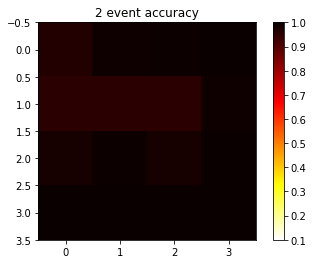

[0.9649999737739563, 0.9900000095367432, 0.9950000047683716, 1.0, 0.9549999833106995, 0.9549999833106995, 0.9549999833106995, 0.9900000095367432, 0.9800000190734863, 0.9950000047683716, 0.9800000190734863, 1.0, 1.0, 1.0, 1.0, 1.0]


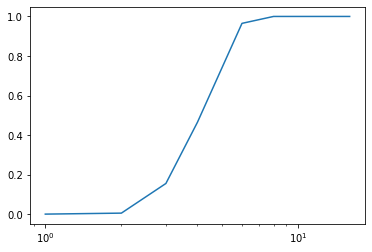

[0.0, 0.004999999888241291, 0.1550000011920929, 0.4650000035762787, 0.9649999737739563, 1.0, 1.0]


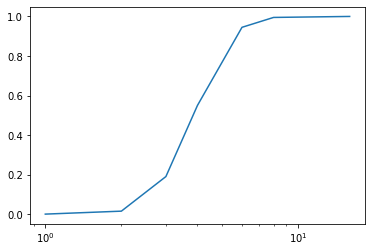

[0.0, 0.014999999664723873, 0.1899999976158142, 0.550000011920929, 0.9449999928474426, 0.9950000047683716, 1.0]


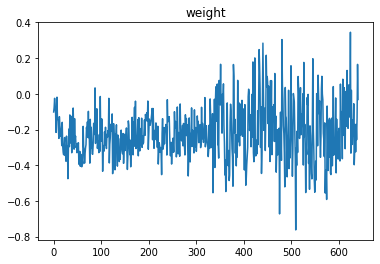

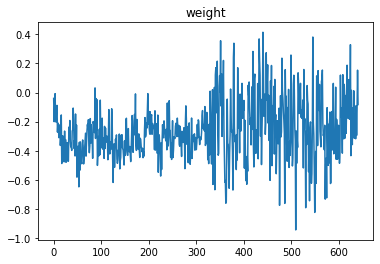

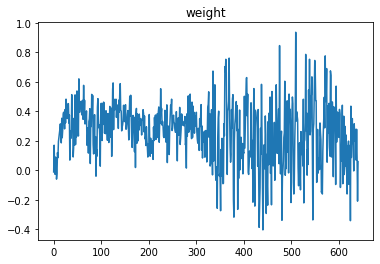

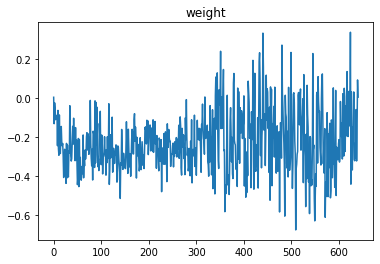

------- 3 --------
200/200 [==============================] - 1s 2ms/step - loss: 0.1623 - accuracy: 0.9759


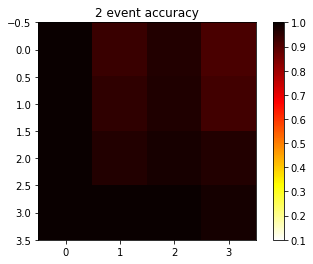

[1.0, 0.9350000023841858, 0.9649999737739563, 0.9150000214576721, 1.0, 0.949999988079071, 0.9700000286102295, 0.925000011920929, 1.0, 0.9649999737739563, 0.9800000190734863, 0.9649999737739563, 1.0, 1.0, 1.0, 0.9850000143051147]


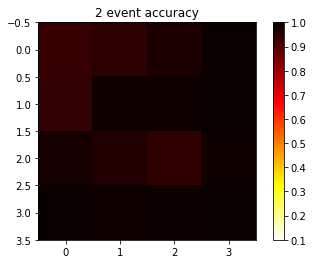

[0.9399999976158142, 0.9549999833106995, 0.9750000238418579, 1.0, 0.9449999928474426, 0.9900000095367432, 0.9900000095367432, 1.0, 0.9850000143051147, 0.9700000286102295, 0.949999988079071, 0.9900000095367432, 1.0, 0.9900000095367432, 0.9950000047683716, 1.0]


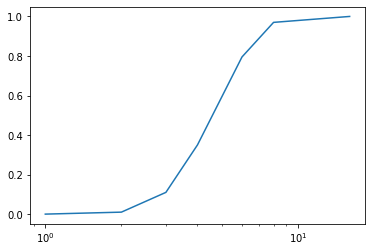

[0.0, 0.009999999776482582, 0.10999999940395355, 0.3499999940395355, 0.7950000166893005, 0.9700000286102295, 1.0]


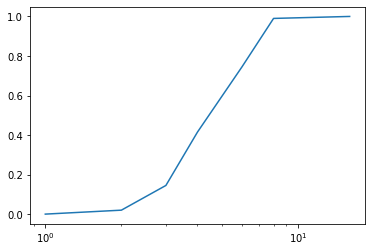

[0.0, 0.019999999552965164, 0.14499999582767487, 0.41499999165534973, 0.7450000047683716, 0.9900000095367432, 1.0]


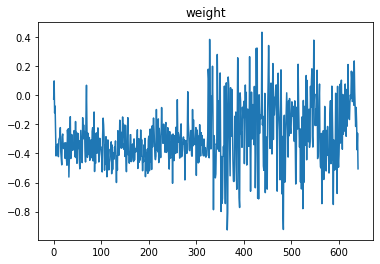

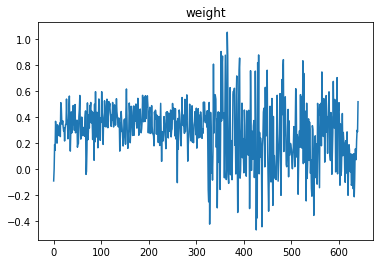

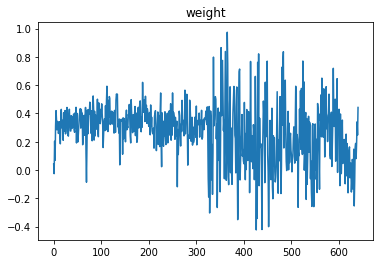

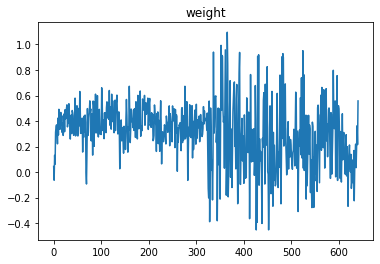

------- 4 --------
200/200 [==============================] - 1s 3ms/step - loss: 0.4708 - accuracy: 0.7870


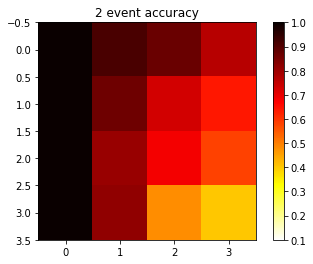

[1.0, 0.9150000214576721, 0.8700000047683716, 0.7649999856948853, 1.0, 0.8650000095367432, 0.7300000190734863, 0.6399999856948853, 1.0, 0.8100000023841858, 0.6850000023841858, 0.5849999785423279, 1.0, 0.8199999928474426, 0.47999998927116394, 0.4050000011920929]


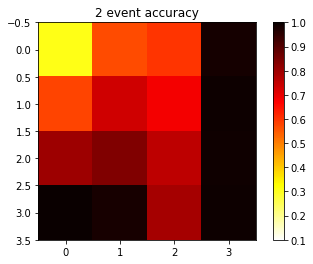

[0.3100000023841858, 0.5699999928474426, 0.6000000238418579, 0.9850000143051147, 0.5799999833106995, 0.7350000143051147, 0.6850000023841858, 0.9950000047683716, 0.800000011920929, 0.8399999737739563, 0.7599999904632568, 0.9900000095367432, 1.0, 0.9800000190734863, 0.7900000214576721, 0.9950000047683716]


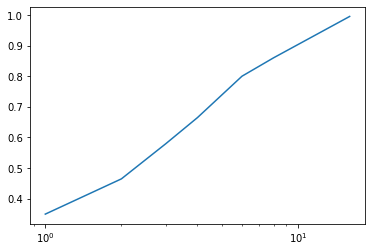

[0.3499999940395355, 0.4650000035762787, 0.5799999833106995, 0.6650000214576721, 0.800000011920929, 0.8600000143051147, 0.9950000047683716]


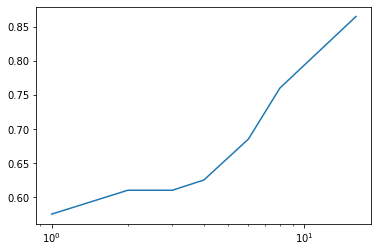

[0.574999988079071, 0.6100000143051147, 0.6100000143051147, 0.625, 0.6850000023841858, 0.7599999904632568, 0.8650000095367432]


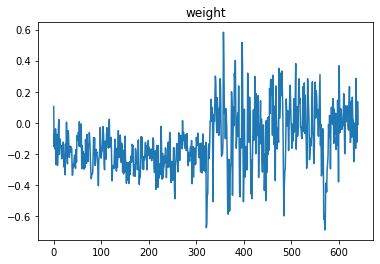

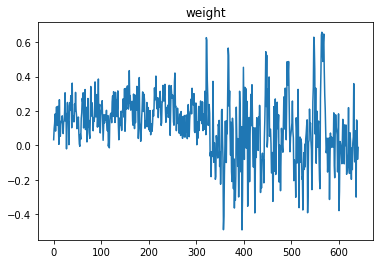

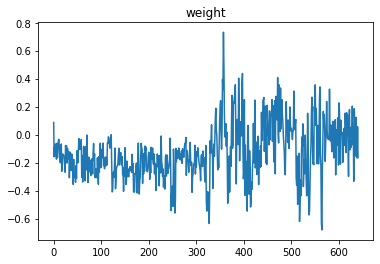

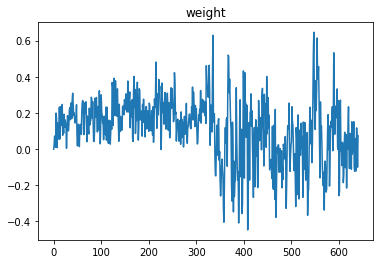

------- 5 --------
200/200 [==============================] - 1s 3ms/step - loss: 0.2433 - accuracy: 0.9361


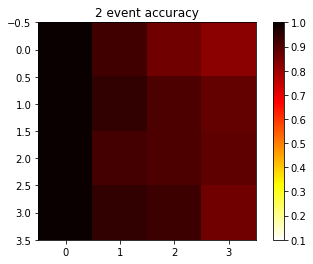

[1.0, 0.925000011920929, 0.8600000143051147, 0.824999988079071, 1.0, 0.9449999928474426, 0.9100000262260437, 0.8799999952316284, 1.0, 0.9200000166893005, 0.9100000262260437, 0.8849999904632568, 1.0, 0.9449999928474426, 0.9300000071525574, 0.8600000143051147]


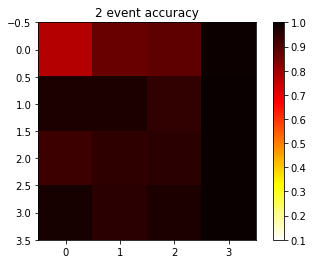

[0.7699999809265137, 0.8700000047683716, 0.8849999904632568, 0.9950000047683716, 0.9750000238418579, 0.9750000238418579, 0.9449999928474426, 1.0, 0.9300000071525574, 0.949999988079071, 0.9549999833106995, 1.0, 0.9800000190734863, 0.9549999833106995, 0.9750000238418579, 1.0]


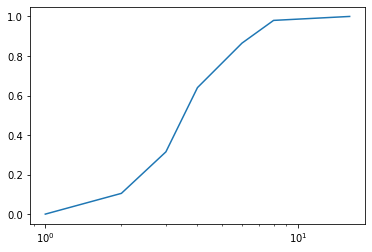

[0.0, 0.10499999672174454, 0.3149999976158142, 0.6399999856948853, 0.8650000095367432, 0.9800000190734863, 1.0]


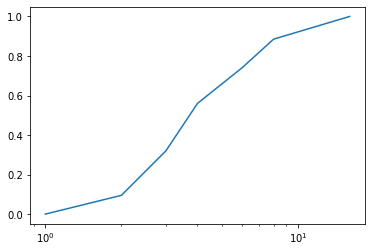

[0.0, 0.0949999988079071, 0.3199999928474426, 0.5600000023841858, 0.7400000095367432, 0.8849999904632568, 1.0]


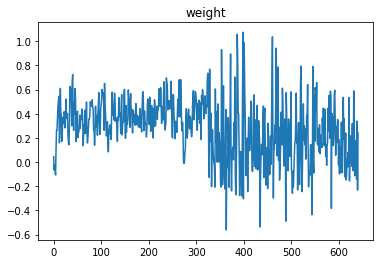

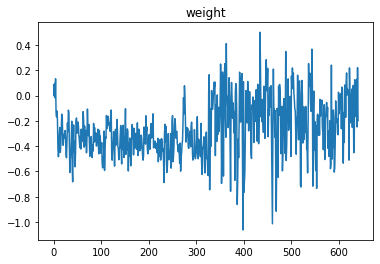

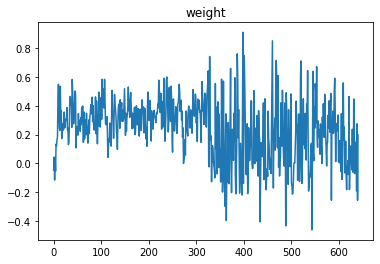

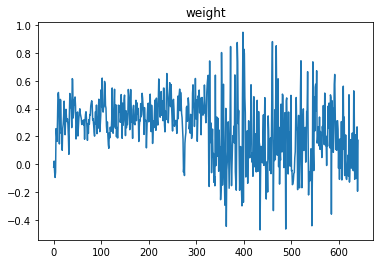

------- 6 --------
200/200 [==============================] - 1s 2ms/step - loss: 0.2667 - accuracy: 0.9038


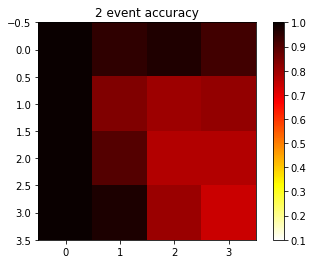

[1.0, 0.949999988079071, 0.9700000286102295, 0.925000011920929, 1.0, 0.8399999737739563, 0.800000011920929, 0.8149999976158142, 1.0, 0.8999999761581421, 0.7749999761581421, 0.7749999761581421, 1.0, 0.9750000238418579, 0.8050000071525574, 0.7400000095367432]


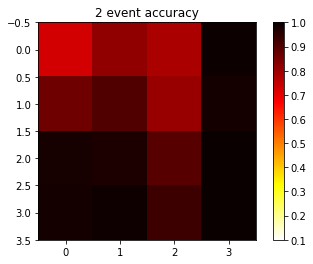

[0.7300000190734863, 0.8199999928474426, 0.7850000262260437, 0.9950000047683716, 0.8650000095367432, 0.9049999713897705, 0.8100000023841858, 0.9850000143051147, 0.9800000190734863, 0.9750000238418579, 0.8949999809265137, 1.0, 0.9850000143051147, 0.9900000095367432, 0.9300000071525574, 1.0]


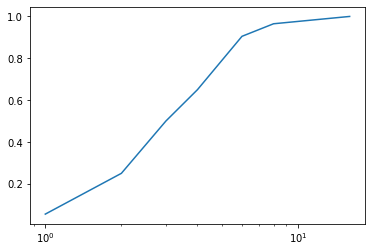

[0.054999999701976776, 0.25, 0.5, 0.6499999761581421, 0.9049999713897705, 0.9649999737739563, 1.0]


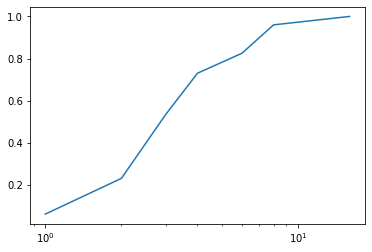

[0.05999999865889549, 0.23000000417232513, 0.5350000262260437, 0.7300000190734863, 0.824999988079071, 0.9599999785423279, 1.0]


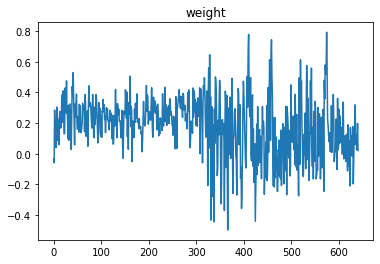

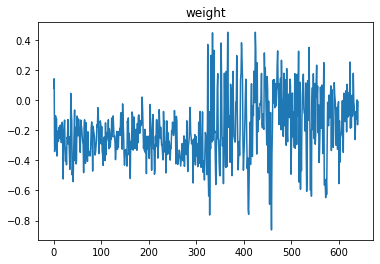

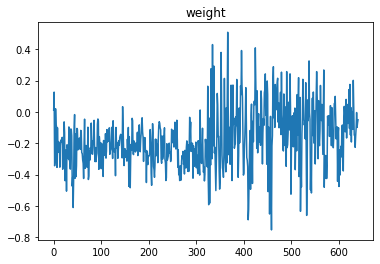

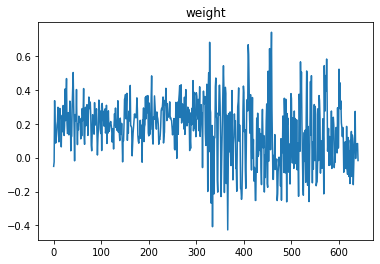

------- 7 --------
200/200 [==============================] - 1s 3ms/step - loss: 0.2282 - accuracy: 0.9375


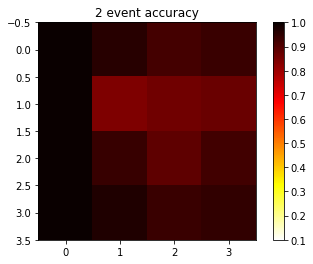

[1.0, 0.9599999785423279, 0.9200000166893005, 0.9350000023841858, 1.0, 0.8450000286102295, 0.8600000143051147, 0.8700000047683716, 1.0, 0.9399999976158142, 0.8849999904632568, 0.925000011920929, 1.0, 0.9700000286102295, 0.9350000023841858, 0.9449999928474426]


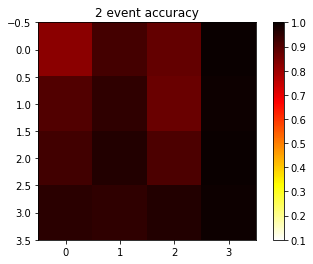

[0.824999988079071, 0.9200000166893005, 0.8799999952316284, 1.0, 0.9049999713897705, 0.949999988079071, 0.8700000047683716, 0.9950000047683716, 0.925000011920929, 0.9649999737739563, 0.9100000262260437, 1.0, 0.9549999833106995, 0.949999988079071, 0.9649999737739563, 0.9950000047683716]


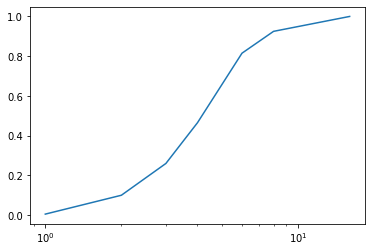

[0.004999999888241291, 0.10000000149011612, 0.25999999046325684, 0.4650000035762787, 0.8149999976158142, 0.925000011920929, 1.0]


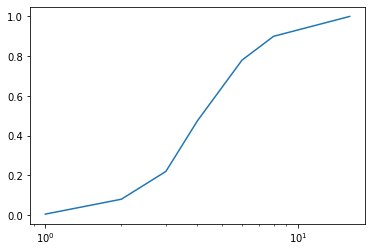

[0.004999999888241291, 0.07999999821186066, 0.2199999988079071, 0.4749999940395355, 0.7799999713897705, 0.8999999761581421, 1.0]


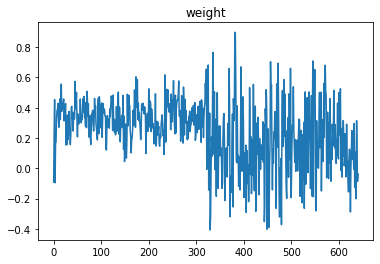

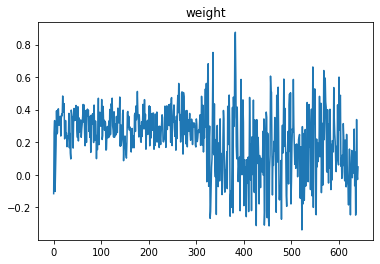

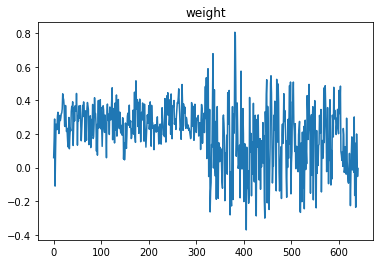

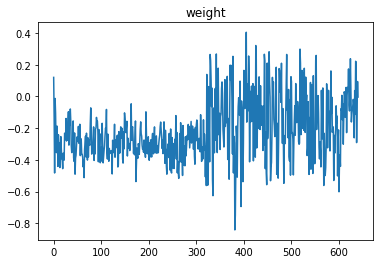

------- 8 --------
200/200 [==============================] - 1s 2ms/step - loss: 0.4101 - accuracy: 0.8253


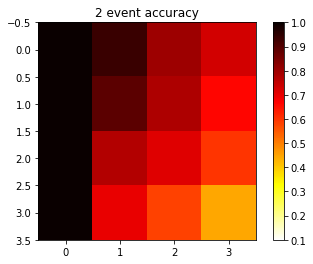

[1.0, 0.9350000023841858, 0.800000011920929, 0.7300000190734863, 1.0, 0.8899999856948853, 0.7799999713897705, 0.6650000214576721, 1.0, 0.7749999761581421, 0.7149999737739563, 0.6000000238418579, 1.0, 0.699999988079071, 0.5849999785423279, 0.4449999928474426]


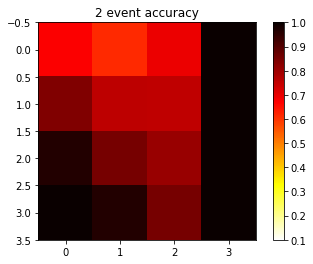

[0.675000011920929, 0.6150000095367432, 0.6949999928474426, 1.0, 0.8399999737739563, 0.7599999904632568, 0.7549999952316284, 1.0, 0.9649999737739563, 0.8550000190734863, 0.8100000023841858, 1.0, 1.0, 0.9649999737739563, 0.8550000190734863, 1.0]


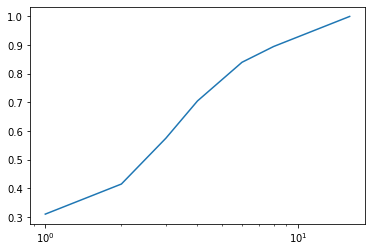

[0.3100000023841858, 0.41499999165534973, 0.574999988079071, 0.7049999833106995, 0.8399999737739563, 0.8949999809265137, 1.0]


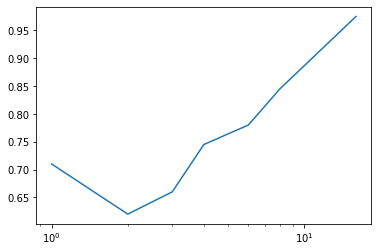

[0.7099999785423279, 0.6200000047683716, 0.6600000262260437, 0.7450000047683716, 0.7799999713897705, 0.8450000286102295, 0.9750000238418579]


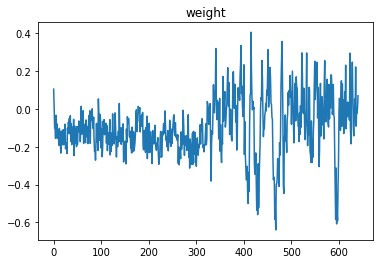

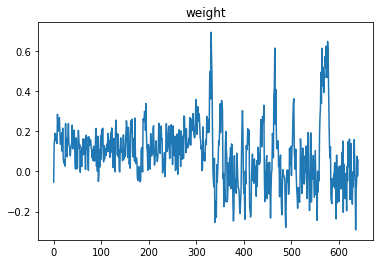

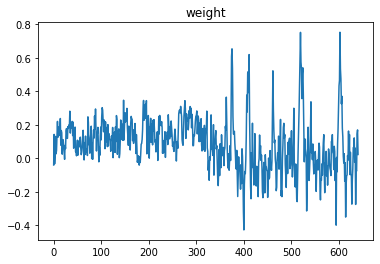

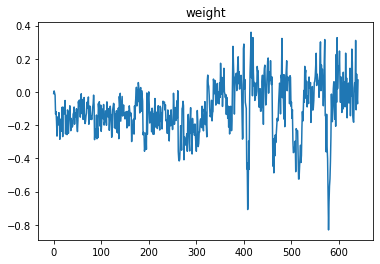

------- 9 --------
200/200 [==============================] - 1s 3ms/step - loss: 0.4641 - accuracy: 0.7837


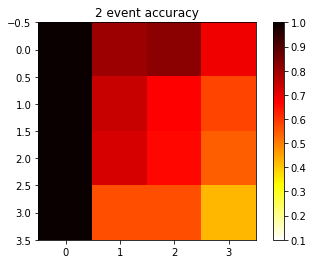

[1.0, 0.800000011920929, 0.824999988079071, 0.6899999976158142, 1.0, 0.7450000047683716, 0.6700000166893005, 0.5799999833106995, 1.0, 0.7250000238418579, 0.6600000262260437, 0.5450000166893005, 1.0, 0.5649999976158142, 0.5649999976158142, 0.42500001192092896]


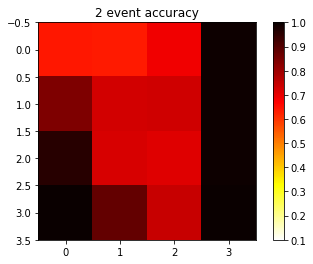

[0.6399999856948853, 0.6349999904632568, 0.6899999976158142, 0.9950000047683716, 0.8450000286102295, 0.7300000190734863, 0.7350000143051147, 0.9950000047683716, 0.9599999785423279, 0.7250000238418579, 0.7149999737739563, 0.9950000047683716, 1.0, 0.8799999952316284, 0.7450000047683716, 1.0]


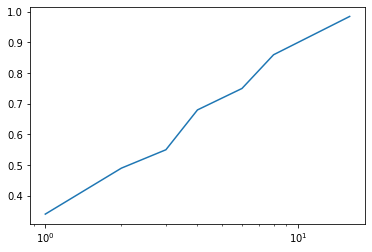

[0.3400000035762787, 0.49000000953674316, 0.550000011920929, 0.6800000071525574, 0.75, 0.8600000143051147, 0.9850000143051147]


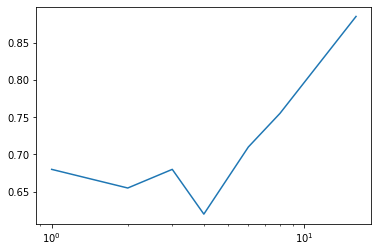

[0.6800000071525574, 0.6549999713897705, 0.6800000071525574, 0.6200000047683716, 0.7099999785423279, 0.7549999952316284, 0.8849999904632568]


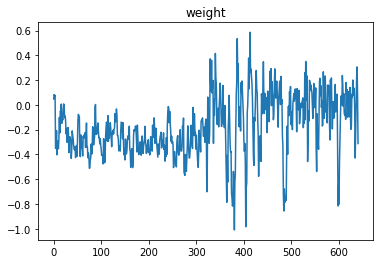

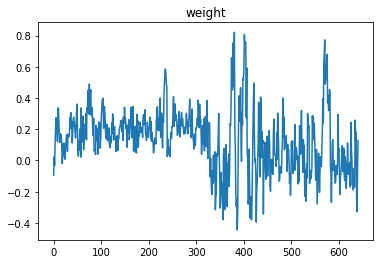

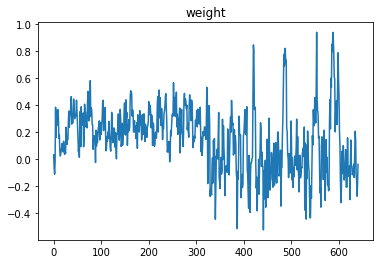

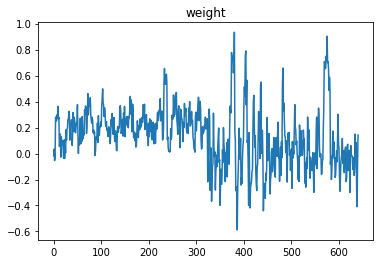

------- 10 --------
200/200 [==============================] - 1s 3ms/step - loss: 0.5179 - accuracy: 0.7633


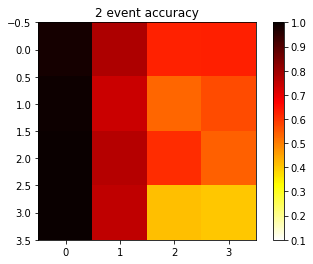

[0.9850000143051147, 0.7799999713897705, 0.625, 0.6299999952316284, 0.9950000047683716, 0.7400000095367432, 0.5350000262260437, 0.5699999928474426, 1.0, 0.7699999809265137, 0.6100000143051147, 0.5400000214576721, 1.0, 0.7549999952316284, 0.41499999165534973, 0.4050000011920929]


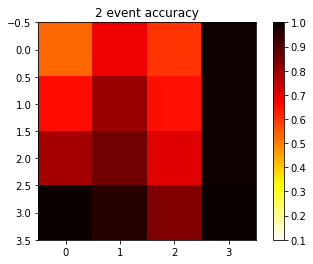

[0.5299999713897705, 0.6899999976158142, 0.6000000238418579, 0.9950000047683716, 0.6549999713897705, 0.8100000023841858, 0.6499999761581421, 0.9900000095367432, 0.7900000214576721, 0.8600000143051147, 0.7099999785423279, 0.9900000095367432, 1.0, 0.9599999785423279, 0.8399999737739563, 1.0]


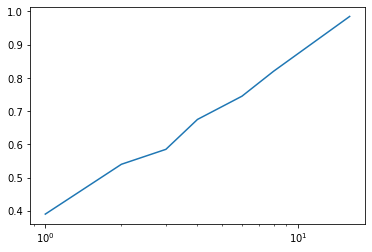

[0.38999998569488525, 0.5400000214576721, 0.5849999785423279, 0.675000011920929, 0.7450000047683716, 0.8199999928474426, 0.9850000143051147]


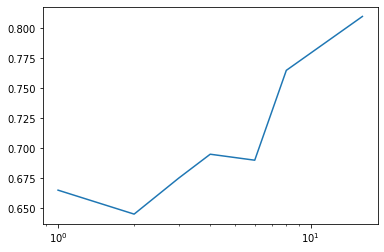

[0.6650000214576721, 0.6449999809265137, 0.675000011920929, 0.6949999928474426, 0.6899999976158142, 0.7649999856948853, 0.8100000023841858]


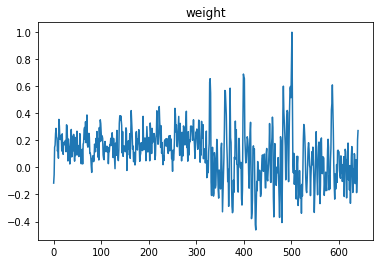

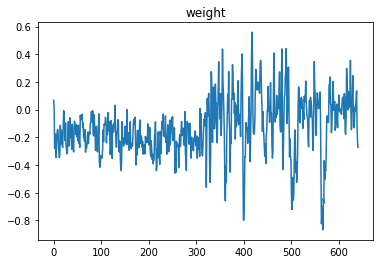

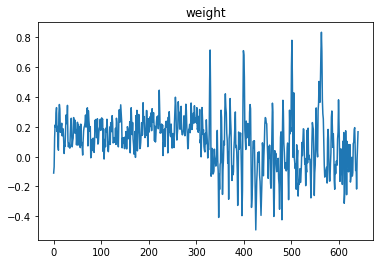

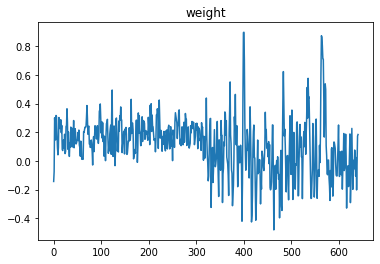

In [ ]:
# cnn
type_amount = cnn_type_amount
Xte = np.expand_dims(Xt, axis=2)
weights = []
for i in range(10):
    print("-------",i+1,'--------')   
    # training + validation data
    X, y = gen_train(on2, total2, on8, total8, type_amount)
    Xr = np.expand_dims(X, axis=2)
    # Convolutionary Neural Network
    keras.backend.clear_session()

    model = keras.Sequential(
        [
            layers.Conv1D(1, 10, activation='relu'),
            layers.Flatten(),
            layers.Dense(4, activation="sigmoid", name="layer1"),
            layers.Dense(1, activation="sigmoid", name="layer2"),
            
        ]
    )
    model.build(input_shape=(None, maxl//minl ,1))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(Xr,y,epochs=100, verbose=0, shuffle=False, validation_split=0.2, callbacks=[es])

    model.evaluate(Xte, yt)
    results = []
    for x in range(0,test_amount*len(on2)*len(total2),test_amount):
        this = np.expand_dims(X2t[x:x+test_amount], axis=2)
        result = model.evaluate(this, np.zeros(test_amount),verbose=0)
        results.append(result[1])
    acc = np.reshape(results, (len(on2),len(total2)))
    o = plt.imshow(acc, cmap='hot_r', interpolation='nearest',vmin=0.1, vmax=1)
    plt.title('2 event accuracy')
    plt.colorbar(o);
    plt.show()
    print(results)           
    results = []
    for x in range(0,test_amount*len(on8)*len(total8),test_amount):
        this = np.expand_dims(X8t[x:x+test_amount], axis=2)
        result = model.evaluate(this, np.ones(test_amount),verbose=0)
        results.append(result[1])
    acc = np.reshape(results, (len(on2),len(total2)))
    o = plt.imshow(acc, cmap='hot_r', interpolation='nearest',vmin=0.1, vmax=1)
    plt.title('2 event accuracy')
    plt.colorbar(o);
    plt.show()           
    print(results) 
    # experiment1
    logist = [] 
    for n in range(0,1400, mix_amount):
        this = np.expand_dims(np.array(X_mix1[n:n+mix_amount]), axis=2)
        l = model.evaluate(this, y_mix, verbose=0)
        logist.append(l[1])
    plt.plot([1,2,3,4,6,8,16],logist)
    plt.xscale("log")
    plt.show()
    print(logist)

    # experiment2
    logist = [] 
    for n in range(0,1400, mix_amount):
        this = np.expand_dims(np.array(X_mix2[n:n+mix_amount]), axis=2)
        l = model.evaluate(this, y_mix, verbose=0)
        logist.append(l[1])
    plt.plot([1,2,3,4,6,8,16],logist)
    plt.xscale("log")
    plt.show()
    print(logist)


    # plot weight
    plt.plot(model.layers[2].get_weights()[0][:,0])
    plt.title('weight')
    plt.show()
    plt.plot(model.layers[2].get_weights()[0][:,1])
    plt.title('weight')
    plt.show()
    plt.plot(model.layers[2].get_weights()[0][:,2])
    plt.title('weight')
    plt.show()
    plt.plot(model.layers[2].get_weights()[0][:,3])
    plt.title('weight')
    plt.show()

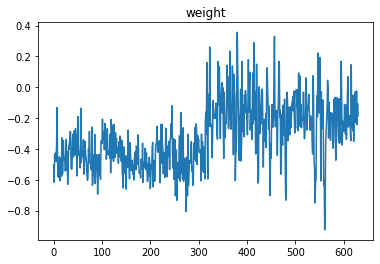

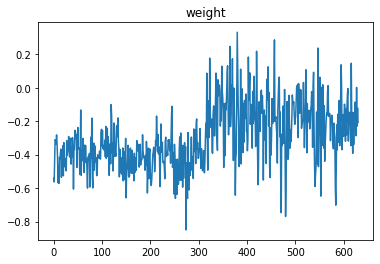

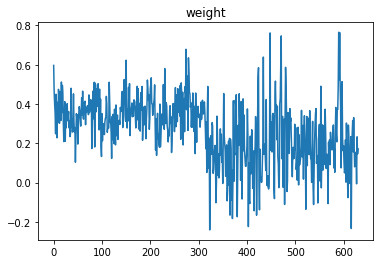

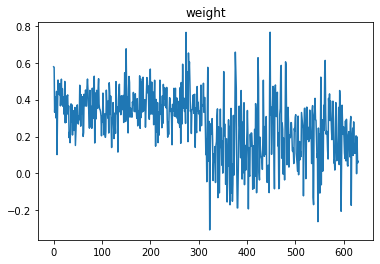

In [ ]:
plt.plot(model.layers[2].get_weights()[0][:,0])
plt.title('weight')
plt.show()
plt.plot(model.layers[2].get_weights()[0][:,1])
plt.title('weight')
plt.show()
plt.plot(model.layers[2].get_weights()[0][:,2])
plt.title('weight')
plt.show()
plt.plot(model.layers[2].get_weights()[0][:,3])
plt.title('weight')
plt.show()